## 📣 SingleStore's Creative Challenge for #NationalPoetryMonth: *Win RayBan Smart sunglasses 😎 and a $500 AWS gift card! 💸*

---


### This notebook can be run on the SingleStore Free Shared Tier Workspace. 
To create a Shared Tier Workspace, please visit: https://www.singlestore.com/cloud-trial

---

#### 🎉 All throughout April, SingleStore is hosting a challenge inviting participants to craft a unique Haiku or create captivating ASCII art using SingleStore Notebooks. The most creative masterpiece wins a set of Meta RayBan Smart sunglasses and a $500 AWS gift card! 

---

#### ➡️ Steps to Participate

✅ Activate your Free Shared Tier with SingleStore here: https://www.singlestore.com/cloud-trial

✅ Create your artistic masterpiece in a SingleStore Notebook, drawing inspiration from this example Notebook and your unique vision.

✅ Share a Github link to your notebook by April 30, 2024: https://docs.google.com/forms/d/e/1FAIpQLSdXcvzSxtTtHYxRG40Pc5HV

✅ Make sure to tag @SingleStore and use #SingleStorePoetry when sharing your work on LinkedIn/X

---

#### For questions about this contest or SingleStore Notebooks, use our dedicated Discord channel: https://discord.gg/re56Fwyd

---

Feel free to make changes to this starter code to generate a Haiku and ASCII art. The below code consists of two main parts:

1. Generating a Haiku: The generate_haiku function creates a simple haiku using pre-defined lists of phrases that correspond to the traditional 5-7-5 syllable structure of haikus. This function randomly selects one phrase from each list to construct the haiku.

2. Visualizing the Haiku: The visualize_haiku function uses matplotlib to create a visualization of the generated haiku. It sets up a figure with a custom background color, hides the axes for a cleaner look, and displays the haiku text in the center with a styled bounding box around it.

In [206]:
!pip install matplotlib --quiet

### Genearing a Haiku with Seasonal Transitions

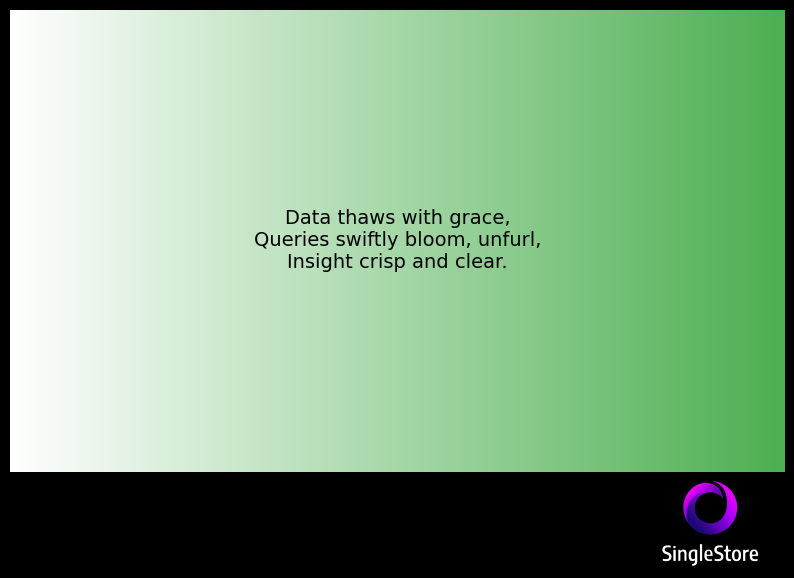

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg  # Import for loading the logo image
import requests  # Import requests to download the logo
from PIL import Image  # Import PIL to handle the image
from io import BytesIO  # Import BytesIO to handle the image as a byte stream

# Seasonal Transition Haiku Generator
def generate_seasonal_transition_haiku():
    seasons = ["Winter", "Spring", "Summer", "Fall"]
    transitions = {
        ("Winter", "Spring"): [
            "Data thaws with grace,",  # 5 syllables
            "Queries swiftly bloom, unfurl,",  # 7 syllables
            "Insight crisp and clear."  # 5 syllables
        ],
        ("Spring", "Summer"): [
            "Insights grow in light,",  # 5 syllables
            "Data scales the bright, warm sun,",  # 7 syllables
            "Wisdom on full show."  # 5 syllables
        ],
        ("Summer", "Fall"): [
            "Leaves of data turn,",  # 5 syllables
            "Decisions ripe and well-earned,",  # 7 syllables
            "Change whispers anew."  # 5 syllables
        ],
        ("Fall", "Winter"): [
            "Data's frost sets in,",  # 5 syllables
            "Vector cycles glean insights,",  # 7 syllables
            "Silence holds the keys."  # 5 syllables
        ],
    }

    # Randomly select a transition
    start_season = np.random.choice(seasons)
    end_season = seasons[(seasons.index(start_season) + 1) % len(seasons)]
    
    haiku_lines = transitions[(start_season, end_season)]
    
    return haiku_lines, start_season, end_season

# Visualization with Gradient
def visualize_seasonal_transition(haiku, start_season, end_season):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')
    
    # Seasonal Colors
    colors = {
        "Winter": "#ffffff",
        "Spring": "#4caf50",
        "Summer": "#ffa726",
        "Fall": "#fb8c00"
    }
    
    # Create Gradient
    cmap = LinearSegmentedColormap.from_list("season_transition", [colors[start_season], colors[end_season]])
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    
    ax.imshow(gradient, aspect='auto', cmap=cmap, extent=[0, 10, 0, 10])
    
    # Display Haiku
    ax.text(5, 5, "\n".join(haiku), ha='center', va='center', fontsize=14, color="black")
    
    # Download the logo
    logo_url = "https://raw.githubusercontent.com/singlestore-labs/spaces-notebooks/master/common/images/singlestore-logo-vertical.png"
    response = requests.get(logo_url)
    logo_img = Image.open(BytesIO(response.content))

    # Convert the Image object to a NumPy array and display it
    logo = np.array(logo_img)
    ax_logo = fig.add_axes([0.75, -0.05, 0.15, 0.15])  # Adjust these values to position and scale the logo
    ax_logo.imshow(logo)
    ax_logo.axis('off')  # Hide the axis of the logo subplot

    plt.show()

# Generate and Visualize
haiku, start_season, end_season = generate_seasonal_transition_haiku()
visualize_seasonal_transition(haiku, start_season, end_season)

## ASCII Art Generation

#### Note that you might have to add the URL to firewall when asked to do so, to be able to access your input image in the below code

In [208]:
!pip install Pillow requests --quiet

In [209]:
import requests
from PIL import Image
from io import BytesIO

# Define the ASCII characters that will be used to replace the pixels.
ASCII_CHARS = ["@", "#", "S", "%", "?", "*", "+", ";", ":", ",", "."]

def resize_image(image, new_width=100):
    width, height = image.size
    ratio = height / width / 1.65  # Correct for aspect ratio
    new_height = int(new_width * ratio)
    resized_image = image.resize((new_width, new_height))
    return resized_image

def grayify(image):
    grayscale_image = image.convert("L")
    return grayscale_image

def pixels_to_ascii(image):
    pixels = image.getdata()
    ascii_str = ''
    for pixel in pixels:
        ascii_str += ASCII_CHARS[pixel // 25]  # Map the pixel value to ASCII_CHARS
    return ascii_str

def process_image_from_url(image_url, new_width=100):
    # Fetch the image from the URL
    response = requests.get(image_url)
    if response.status_code == 200:
        # Open the image from the bytes in response content
        image = Image.open(BytesIO(response.content))
        
        # Process the image
        image = resize_image(image, new_width)
        image = grayify(image)
        ascii_str = pixels_to_ascii(image)

        # Format the ASCII string so that each line has `new_width` characters.
        img_width = image.width
        ascii_str_len = len(ascii_str)
        ascii_img = ""
        for i in range(0, ascii_str_len, img_width):
            ascii_img += ascii_str[i:i+img_width] + "\n"
        
        # Print the ASCII art
        print(ascii_img)
    else:
        print("Failed to retrieve the image from the URL")

# Example usage with a public image URL
image_url = 'https://raw.githubusercontent.com/singlestore-labs/spaces-notebooks/master/common/images/singlestore-banner.png'  # Replace with your image's URL
process_image_from_url(image_url, 100)

#######@@@#######@@#################################################################################
#####@#S%%%%%SSS%%S#@########@@@######################@@@###########@@@#############################
#####S****??%%SS#%*?#@#####@##SS##@#@################@S+?@########@##SS#############################
####?+*??%SS###SS#%+*S@####*::::;#%:?@@@#@@@####@@@@@@?.+@##@@@###?:::::S@*,S@###@@@###@@#@@##@@@###
##@%+*%%##@########**+S@#@+.+###S@S*%@SS#S%S@#@@S%%SS@?.+@@#%%S#@?.;###S#S;.?S#@#%%S#@#SS#SS@#S%%#@#
###**%S#@##########?*+?@#@*.;%#@@@?,+@;,;:,,*@S;,;;,:#?.+@%:;+:;#%.:%S#@S;,.:;S%::;::S@;,;:+S;:+;:S@
#@S*%SS############??*?####*:,,:?@?.+@;.?@%.:@;.?@#,,#?.+#:,S#*.?@?;,,:*#@:.S@#,,S@%.:@;.?#@+.?#%.;@
###?SSS##########@S??*?###@@@#%:.%?.+@;.%@S.:#:.S@#,,#?.+#,,++;;?@@@#S;.*@:.S@S.,#@S.,#;.%@@;.;++;+#
###SSSSS##########%%??S@###S##S:.%?.+@;.%@S.:@;.*#%,,#?.+@:.?#####S###+.*@;.?##:.%@?.;@;.%@@*.+#####
####SSSSSS######S%%%%S###@?:::::?@?,*@+,%@S,;@S;,:+,,#%,+@S;::::SS:::::*#@%:,:%S;:;:;S@+,S@

---

#### ➡️ Next Steps:

✅ Share a Github link to your notebook by April 30, 2024: https://docs.google.com/forms/d/e/1FAIpQLSdXcvzSxtTtHYxRG40Pc5HV

✅ Make sure to tag @SingleStore and use #SingleStorePoetry when sharing your work on LinkedIn/X
